# Pregled prostornih podataka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import osmnx as ox
import geopandas as gpd
import seaborn as sns
import folium
import warnings
warnings.filterwarnings('ignore')

### Učitavanje podataka i spajanje podatkovnog skupa dostava s podatkovnim skupom statistike gradova

In [2]:
dataRL = pd.read_csv("dataset/deliverytime_with_route_lengths.csv")

dataRL.head()

,Unnamed: 0.1,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,...,City,Time_taken(min),Datetime_Ordered,Datetime_Picked,distance(km),city_code,Restaurant_node_id,Delivery_node_id,shortest_path,shortest_path_length
0,0,0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,...,Urban,24,2022-03-19 11:30:00,2022-03-19 11:45:00,3.020737,INDO,6596573100,6596217680,"[6596573100, 6241358589, 8444869402, 624135858...",3940.990
1,78,93,0x6d19,INDORES12DEL02,38,4.9,22.748060,75.893400,22.768060,75.913400,...,Urban,15,2022-03-11 08:40:00,2022-03-11 08:55:00,3.020707,INDO,2022007672,8434225364,"[2022007672, 2022007827, 2022007883, 202200790...",4417.569
2,88,104,0x6757,INDORES05DEL02,24,4.3,22.727021,75.884167,22.747021,75.904167,...,Urban,19,2022-03-15 08:45:00,2022-03-15 09:00:00,3.020916,INDO,2023845111,8390302151,"[2023845111, 2023845130, 2023845141, 844496039...",3743.853
3,103,121,0x2bc0,INDORES14DEL01,39,4.2,22.761593,75.886362,22.871593,75.996362,...,Metropolitian,39,2022-03-29 18:45:00,2022-03-29 18:50:00,16.610673,INDO,2020718366,5206545962,"[2020718366, 6590363360, 2021678355, 700731990...",21436.115
4,114,133,0x977d,INDORES19DEL02,27,4.7,22.745536,75.893106,22.765536,75.913106,...,Metropolitian,14,2022-03-09 09:00:00,2022-03-09 09:05:00,3.020732,INDO,6241358589,8444592232,"[6241358589, 8444869402, 6241358587, 624135858...",4107.151


In [3]:
cityStats = pd.read_json("dataset/city_basic_stats.json")

cityStats.head()

,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportions,intersection_count,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,node_density_km,intersection_density_km,edge_density_km,street_density_km,city_code
0,29465,77283,5.245749,6.472429e+06,83.749714,2.753368,"{'0': 0, '1': 5430, '2': 32, '3': 20423, '4': ...","{'0': 0.0, '1': 0.184286441540811, '2': 0.0010...",24035,3.428185e+06,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395,INDO
1,122175,304246,4.980495,2.116750e+07,69.573644,2.624424,"{'0': 0, '1': 30710, '2': 110, '3': 75913, '4'...","{'0': 0.0, '1': 0.25136075301821104, '2': 0.00...",91465,1.124604e+07,159980,70.296563,1.078784,0.002944,155.680408,116.548464,26972.502627,14330.171927,BANG
2,29695,77235,5.201886,7.302358e+06,94.547269,2.681697,"{'0': 0, '1': 6471, '2': 3, '3': 19760, '4': 3...","{'0': 0.0, '1': 0.21791547398551903, '2': 0.00...",23224,3.775631e+06,39665,95.187983,1.069242,0.001210,61.683927,48.242045,15168.821080,7842.928795,COIMB
3,61955,161887,5.225954,1.215897e+07,75.107757,2.745234,"{'0': 0, '1': 11691, '2': 45, '3': 42667, '4':...","{'0': 0.0, '1': 0.18870147687837902, '2': 0.00...",50264,6.468554e+06,84852,76.233371,1.059412,0.001992,89.860659,72.903820,17635.590444,9382.108349,CHEN
4,23067,55634,4.823688,5.815827e+06,104.537283,2.460485,"{'0': 0, '1': 6749, '2': 4, '3': 15264, '4': 1...","{'0': 0.0, '1': 0.292582477131833, '2': 0.0001...",16318,2.967503e+06,28250,105.044344,1.079440,0.000885,46.786406,33.097524,11796.144067,6018.935620,RANCHI


In [4]:
jointData = pd.merge(dataRL,cityStats,on="city_code",how="outer")
jointData.head(100)

,Unnamed: 0.1,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,...,intersection_count,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,node_density_km,intersection_density_km,edge_density_km,street_density_km
0,0,0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395
1,78,93,0x6d19,INDORES12DEL02,38,4.9,22.748060,75.893400,22.768060,75.913400,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395
2,88,104,0x6757,INDORES05DEL02,24,4.3,22.727021,75.884167,22.747021,75.904167,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395
3,103,121,0x2bc0,INDORES14DEL01,39,4.2,22.761593,75.886362,22.871593,75.996362,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395
4,114,133,0x977d,INDORES19DEL02,27,4.7,22.745536,75.893106,22.765536,75.913106,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1260,1527,0x5cfe,INDORES19DEL02,37,4.8,22.745536,75.893106,22.825536,75.973106,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395
96,1281,1551,0x85ec,INDORES03DEL01,24,4.8,22.751857,75.866699,22.821857,75.936699,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395
97,1293,1566,0xdbc,INDORES15DEL01,20,4.7,22.760072,75.892574,22.770072,75.902574,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395
98,1298,1571,0x2445,INDORES15DEL03,36,4.8,22.760072,75.892574,22.790072,75.922574,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395


In [5]:
print("Length of deliverytime_with_route_lengths:",len(dataRL))
print("Length of city stats:",len(cityStats))
print("------------------------------------------")
print("Length of new merged dataset:",len(jointData))

Length of deliverytime_with_route_lengths: 35159
Length of city stats: 21
------------------------------------------
Length of new merged dataset: 35159


### Pregled nedostajućih vrijednosti

In [6]:

null_count = jointData.isnull().sum()
print("\nCount of null values in each column:")
print(null_count)



Count of null values in each column:
Unnamed: 0.1                      0
Unnamed: 0                        0
ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
Datetime_Ordered                  0
Datetime_Picked                   0
distance(km)                      0
city_code                         0
Restaurant_node_id                0
Delivery_node_id                  0
shortest_path                   329
shortest_path_length      

### Micanje nedostajućih vrijednosti

In [7]:
filtered_df = jointData[jointData['shortest_path'].isna() | jointData['shortest_path'].isnull()]

print("City Codes with NaN or Null shortest_path:")
print(filtered_df['city_code'].unique())
print("---------------------------------")
print(filtered_df['city_code'].value_counts())

City Codes with NaN or Null shortest_path:
['BANG' 'LUDH' 'AGR']
---------------------------------
city_code
LUDH    171
BANG    155
AGR       3
Name: count, dtype: int64


662 missing values across 4 cities, removing data (1,5%):

In [8]:
jointData_filtered = jointData.drop(filtered_df.index)

print("\nDataFrame after removing rows:")
print(jointData_filtered)


DataFrame after removing rows:
       Unnamed: 0.1  Unnamed: 0       ID Delivery_person_ID  \
0                 0           0  0x4607     INDORES13DEL02    
1                78          93  0x6d19     INDORES12DEL02    
2                88         104  0x6757     INDORES05DEL02    
3               103         121  0x2bc0     INDORES14DEL01    
4               114         133  0x977d     INDORES19DEL02    
...             ...         ...      ...                ...   
35154         37658       45118  0xc560      BHPRES11DEL03    
35155         37774       45251  0xc8aa      BHPRES16DEL03    
35156         37822       45306  0xe105      BHPRES17DEL02    
35157         37919       45421  0xe0b2      BHPRES17DEL03    
35158         37946       45453  0xc4ee      BHPRES03DEL02    

       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                       37                      4.9            22.745049   
1                       38                      4.9        

In [9]:

print(jointData.columns.values)

['Unnamed: 0.1' 'Unnamed: 0' 'ID' 'Delivery_person_ID'
 'Delivery_person_Age' 'Delivery_person_Ratings' 'Restaurant_latitude'
 'Restaurant_longitude' 'Delivery_location_latitude'
 'Delivery_location_longitude' 'Weatherconditions' 'Road_traffic_density'
 'Vehicle_condition' 'Type_of_order' 'Type_of_vehicle'
 'multiple_deliveries' 'Festival' 'City' 'Time_taken(min)'
 'Datetime_Ordered' 'Datetime_Picked' 'distance(km)' 'city_code'
 'Restaurant_node_id' 'Delivery_node_id' 'shortest_path'
 'shortest_path_length' 'n' 'm' 'k_avg' 'edge_length_total'
 'edge_length_avg' 'streets_per_node_avg' 'streets_per_node_counts'
 'streets_per_node_proportions' 'intersection_count' 'street_length_total'
 'street_segment_count' 'street_length_avg' 'circuity_avg'
 'self_loop_proportion' 'node_density_km' 'intersection_density_km'
 'edge_density_km' 'street_density_km']


### Micanje monotonih vrijednosti 

In [10]:
columns_to_drop = ['Unnamed: 0', 'ID', 'Delivery_person_ID']

altered_jointData = jointData.drop(columns=columns_to_drop)

print("\nDataFrame after dropping specific columns:")
altered_jointData.head()


DataFrame after dropping specific columns:


,Unnamed: 0.1,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,...,intersection_count,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,node_density_km,intersection_density_km,edge_density_km,street_density_km
0,0,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395
1,78,38,4.9,22.748060,75.893400,22.768060,75.913400,Cloudy,Low,2,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395
2,88,24,4.3,22.727021,75.884167,22.747021,75.904167,Sandstorms,Low,0,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395
3,103,39,4.2,22.761593,75.886362,22.871593,75.996362,Fog,Medium,1,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395
4,114,27,4.7,22.745536,75.893106,22.765536,75.913106,Cloudy,Low,1,...,24035,3428185.468,40455,84.740711,1.055086,0.000939,64.537488,52.644104,14176.627266,7508.789395


### Spremanje promjena

In [11]:
altered_jointData.to_csv("dataset/deliverytime_with_routes_and_lengths_cleaned.csv")

### Pregled gustoće raskrižja po gradovima

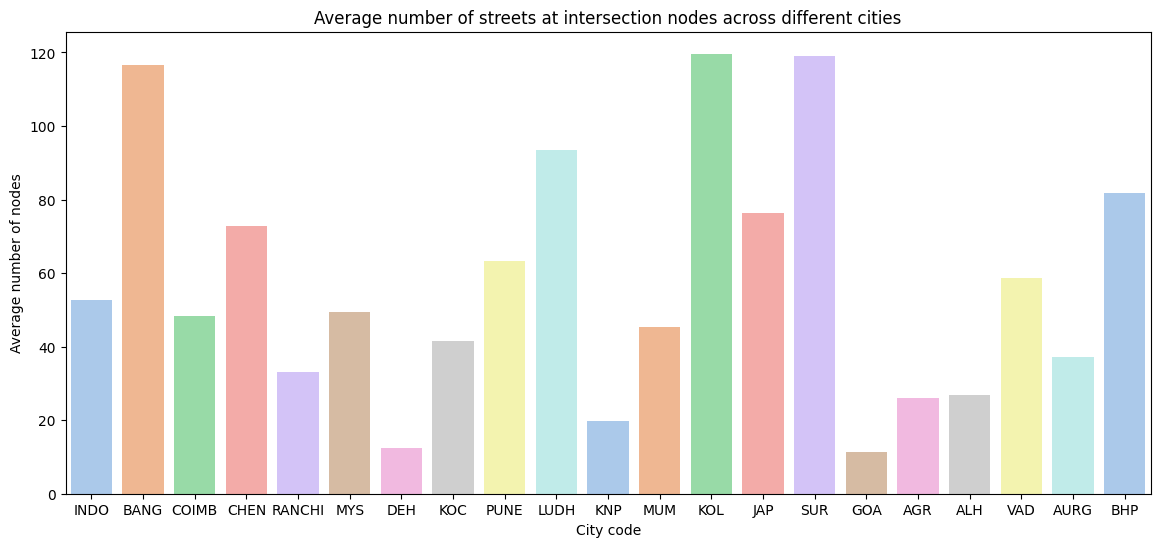

In [12]:

plt.figure(figsize=(14, 6))
sns.barplot(x='city_code', y='intersection_density_km', data=altered_jointData, palette='pastel')
plt.xlabel('City code')
plt.ylabel('Average number of nodes')
plt.title('Average number of streets at intersection nodes across different cities')
plt.show()


### Pregled "kružnosti" (circuity) po gradovima
- circuity - faktor za koji su stvarne udaljenosti veće od zračnih

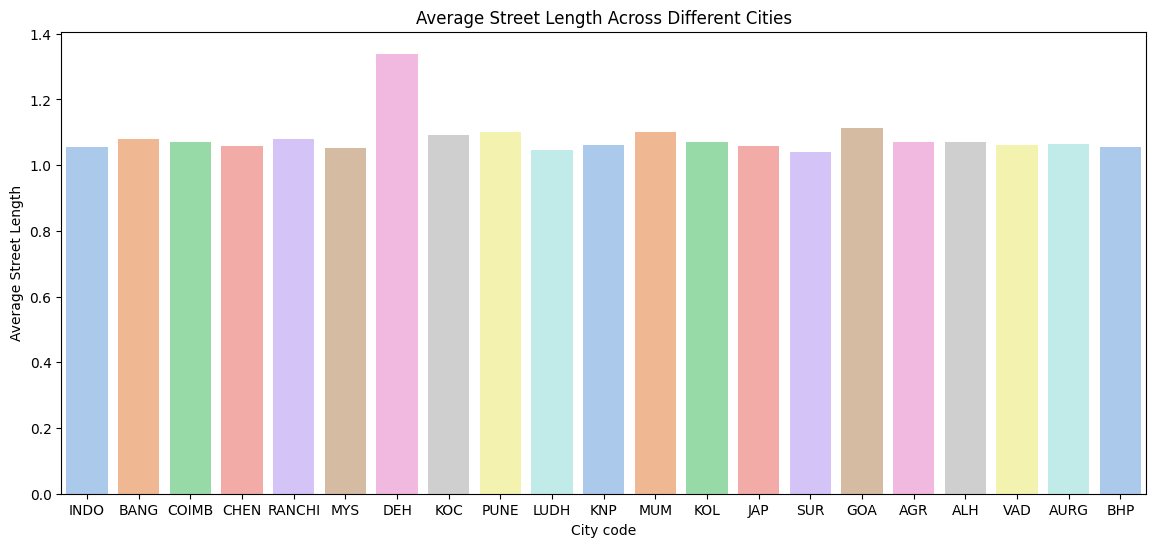

In [13]:
plt.figure(figsize=(14, 6))
sns.barplot(x='city_code', y='circuity_avg', data=altered_jointData, palette='pastel')
plt.xlabel('City code')
plt.ylabel('Average Street Length')
plt.title('Average Street Length Across Different Cities')
plt.show()

Means and medians for some useful city stat attributes compared:

In [14]:

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), gridspec_kw={'hspace': 0.5})

# # Time taken
# axes[0, 0].bar(city_stats.index, city_stats[('Time_taken(min)', 'mean')], label='Mean')
# axes[0, 0].bar(city_stats.index, city_stats[('Time_taken(min)', 'median')], label='Median')
# axes[0, 0].set_xlabel('City code')
# axes[0, 0].set_ylabel('Time taken (min)')
# axes[0, 0].set_title('Sr. vrijednost i medijan - vrijeme dostave')
# axes[0, 0].legend()
# axes[0, 0].tick_params(axis='x', rotation=45)  

# # Street length
# axes[0, 1].bar(city_stats.index, city_stats[('street_length_avg', 'mean')], label='Mean')
# axes[0, 1].bar(city_stats.index, city_stats[('street_length_avg', 'median')], label='Median')
# axes[0, 1].set_xlabel('City code')
# axes[0, 1].set_ylabel('Street Length')
# axes[0, 1].set_title('Sr. vrijednost i medijan - prosječna duljina ulice')
# axes[0, 1].legend()
# axes[0, 1].tick_params(axis='x', rotation=45)  

# # Intersection density
# axes[1, 0].bar(city_stats.index, city_stats[('intersection_density_km', 'mean')], label='Mean', alpha=0.5)
# axes[1, 0].bar(city_stats.index, city_stats[('intersection_density_km', 'median')], label='Median')
# axes[1, 0].set_xlabel('City code')
# axes[1, 0].set_ylabel('Intersection Density (km)')
# axes[1, 0].set_title('Sr. vrijednost i medijan - gustoća raskrižja')
# axes[1, 0].legend()
# axes[1, 0].tick_params(axis='x', rotation=45)  

# # Intersection count
# axes[1, 1].bar(city_stats.index, city_stats[('intersection_count', 'mean')], label='Mean', alpha=0.5)
# axes[1, 1].bar(city_stats.index, city_stats[('intersection_count', 'median')], label='Median')
# axes[1, 1].set_xlabel('City code')
# axes[1, 1].set_ylabel('Intersection Count')
# axes[1, 1].set_title('Sr. vrijednost i medijan- broj raskrižja')
# axes[1, 1].legend()
# axes[1, 1].tick_params(axis='x', rotation=45)  

# plt.tight_layout()
# fig.suptitle("Usporedba geografskih podataka po gradovima")
# plt.show()


## Korelacijska matrica dodanih statističkih podataka za gradove

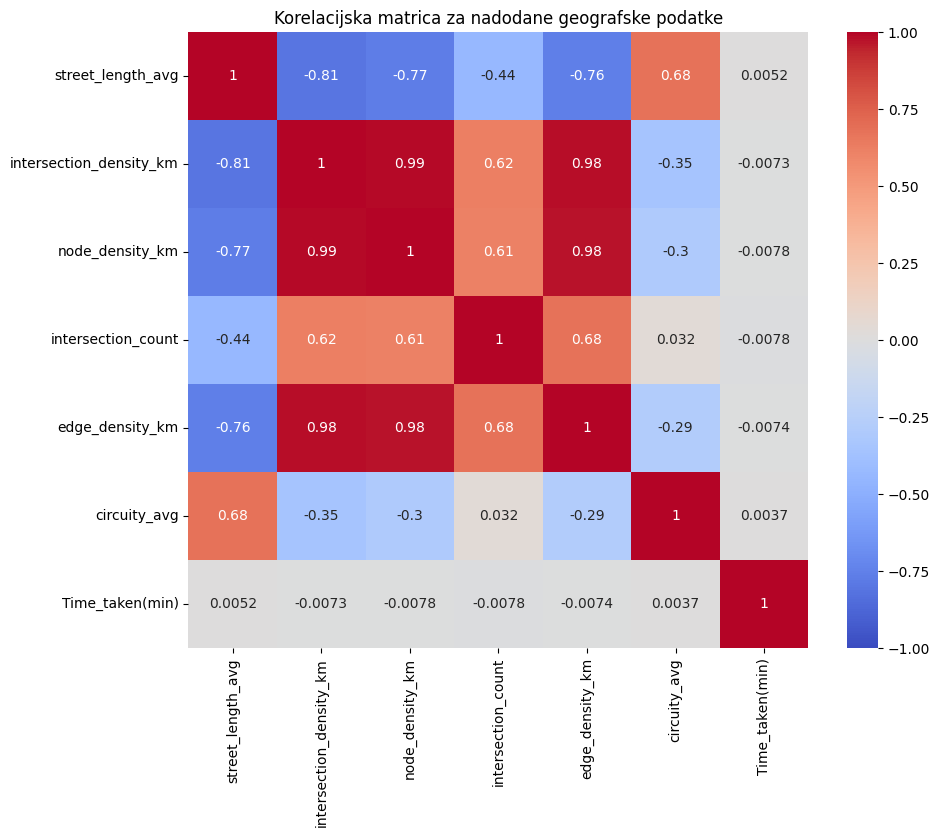

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


numerical_columns = ['street_length_avg', 'intersection_density_km', 'node_density_km', 'intersection_count', 'edge_density_km', 'circuity_avg','Time_taken(min)']


numerical_data = altered_jointData[numerical_columns]


correlation_matrix = numerical_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelacijska matrica za nadodane geografske podatke')
plt.show()


## Pregled distribucije vremena dostave u ovisnosti o nekim statistikama gradova

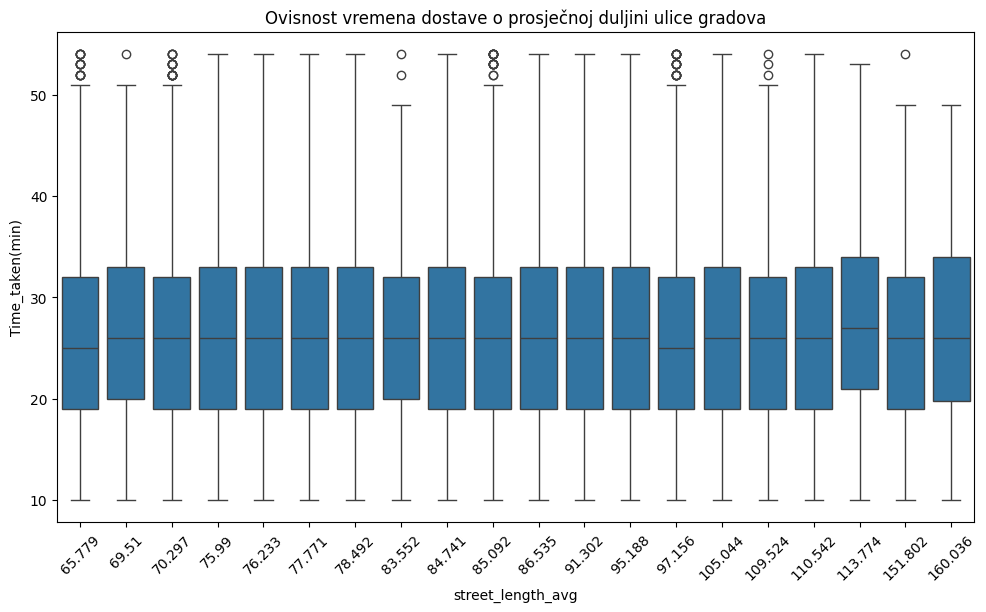

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=altered_jointData['street_length_avg'].round(3), y=altered_jointData['Time_taken(min)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Ovisnost vremena dostave o prosječnoj duljini ulice gradova')
plt.show()


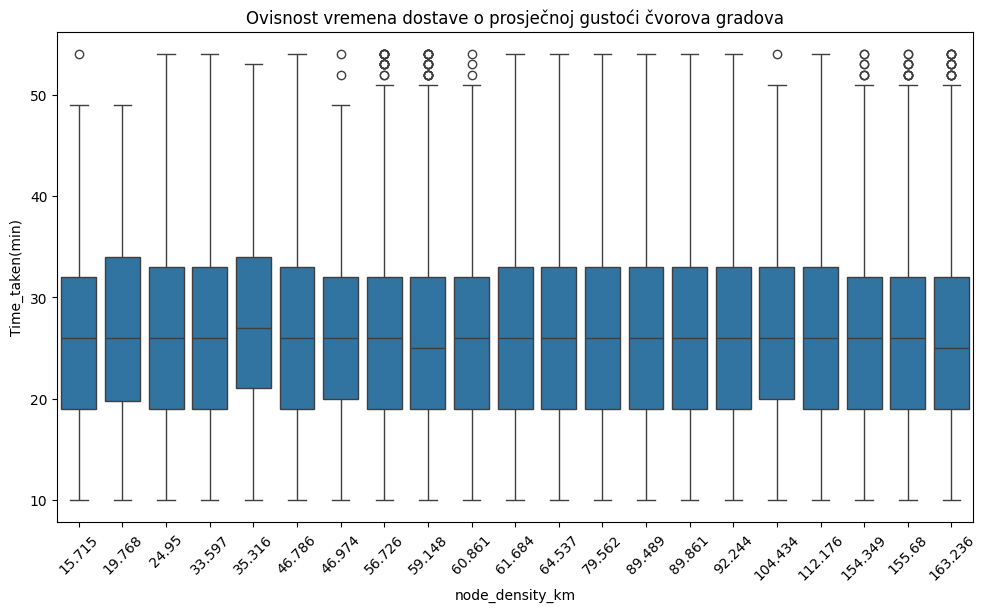

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=altered_jointData['node_density_km'].round(3), y=altered_jointData['Time_taken(min)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Ovisnost vremena dostave o prosječnoj gustoći čvorova gradova')
plt.show()


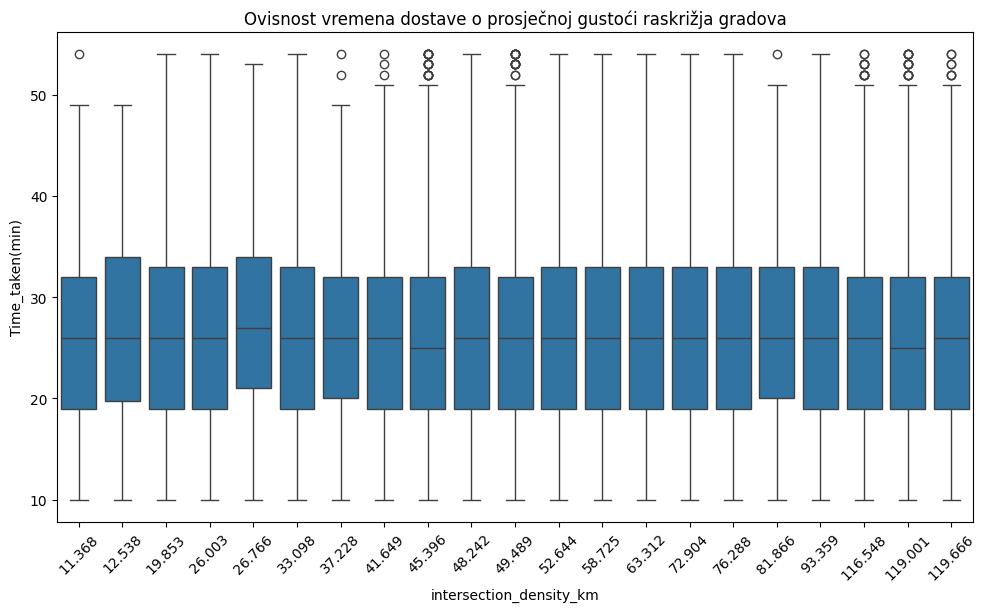

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=altered_jointData['intersection_density_km'].round(3), y=altered_jointData['Time_taken(min)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Ovisnost vremena dostave o prosječnoj gustoći raskrižja gradova')
plt.show()

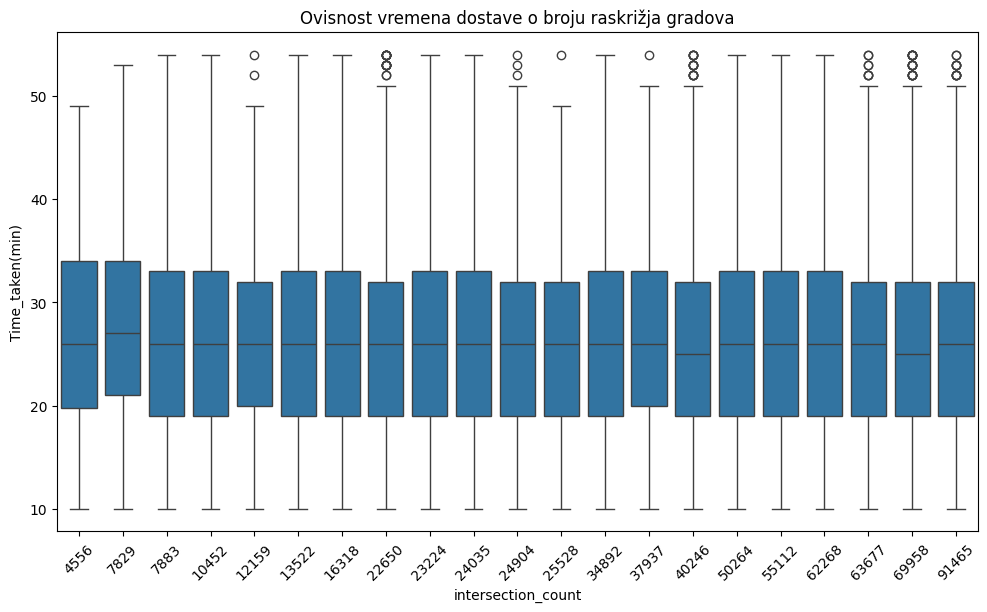

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=altered_jointData['intersection_count'].round(3), y=altered_jointData['Time_taken(min)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Ovisnost vremena dostave o broju raskrižja gradova')
plt.show()

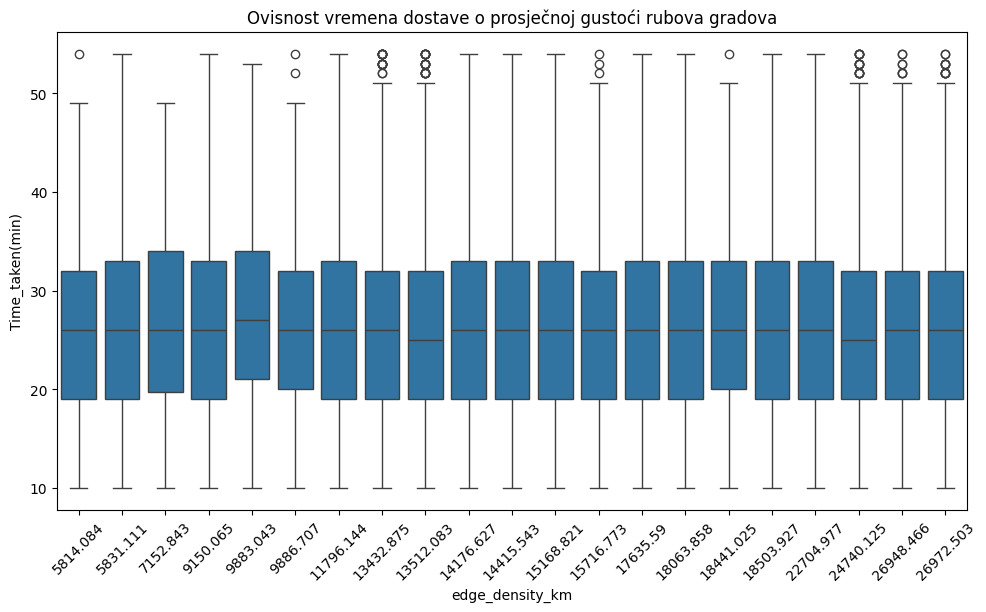

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=altered_jointData['edge_density_km'].round(3), y=altered_jointData['Time_taken(min)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Ovisnost vremena dostave o prosječnoj gustoći rubova gradova')
plt.show()

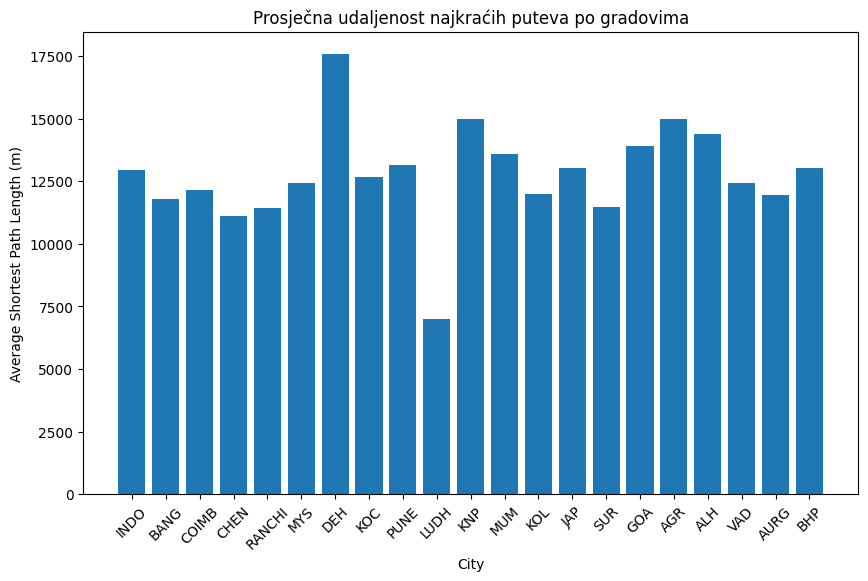

In [21]:

avg_shortest_path_lengths = []


for city_code in altered_jointData['city_code'].unique():
  
    city_data = altered_jointData[altered_jointData['city_code'] == city_code]
    
    
    avg_shortest_path_length = city_data['shortest_path_length'].mean()
    
    
    avg_shortest_path_lengths.append(avg_shortest_path_length)


plt.figure(figsize=(10, 6))
plt.bar(altered_jointData['city_code'].unique(), avg_shortest_path_lengths)
plt.xlabel('City')
plt.ylabel('Average Shortest Path Length (m)')
plt.title('Prosječna udaljenost najkraćih puteva po gradovima')
plt.xticks(rotation=45)
plt.show()


## Ovisnost vremena dostave o duljini najkraćeg puta po gradovima

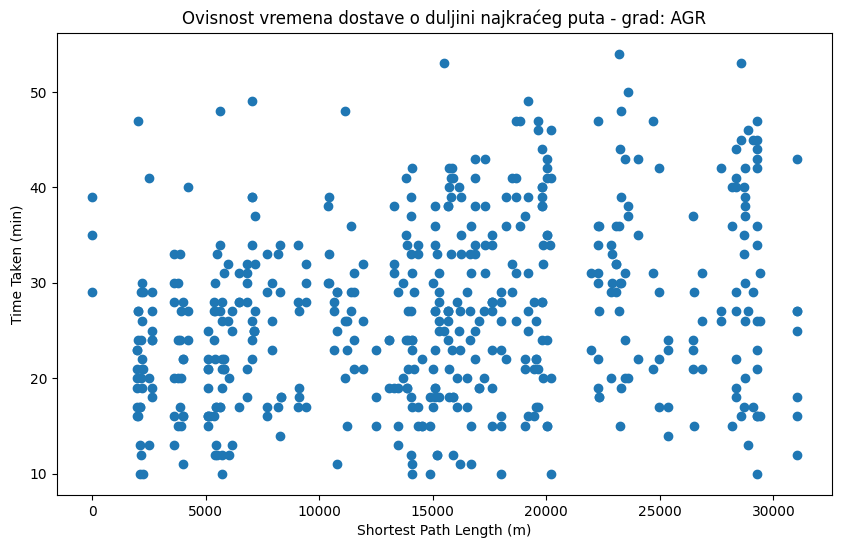

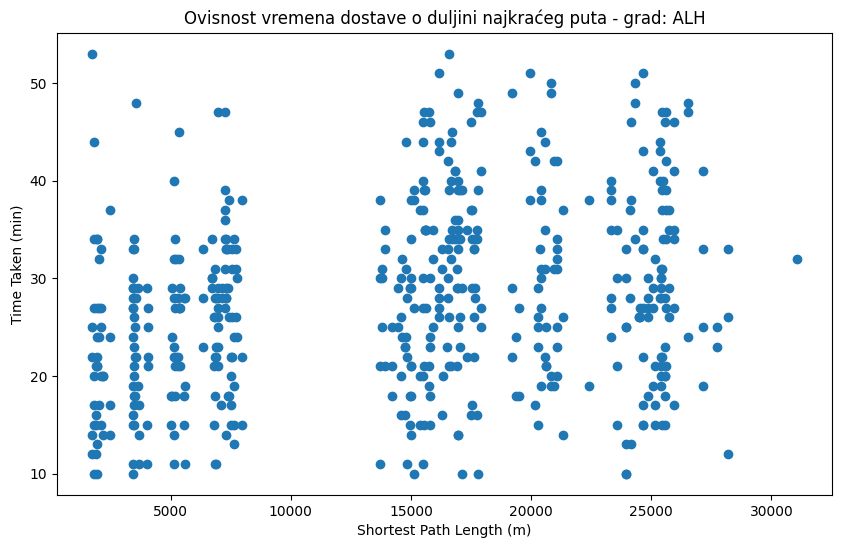

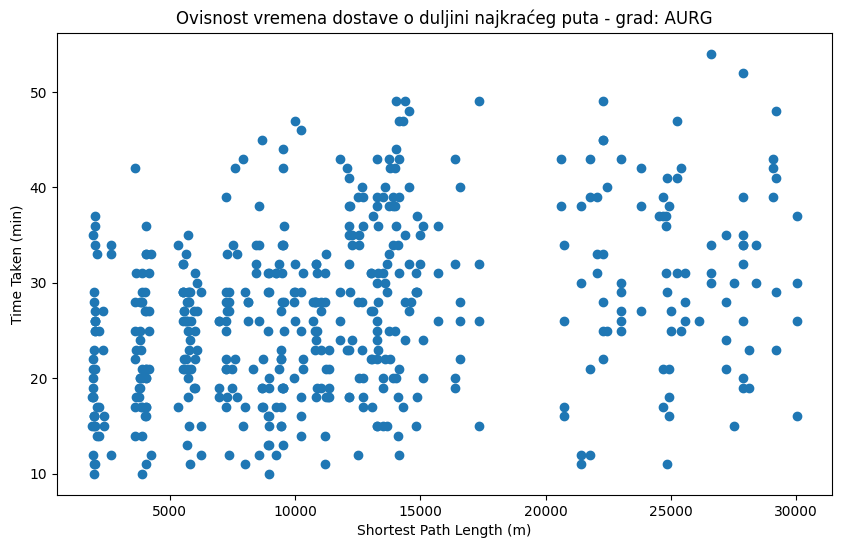

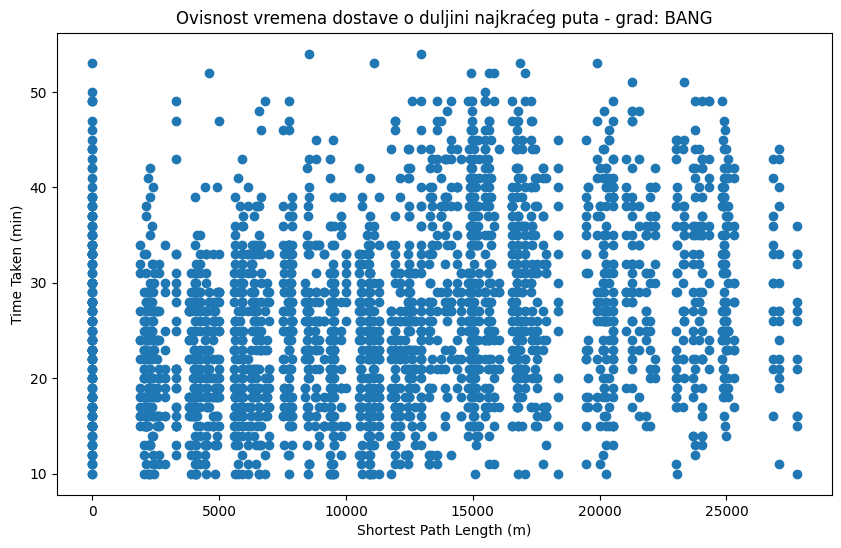

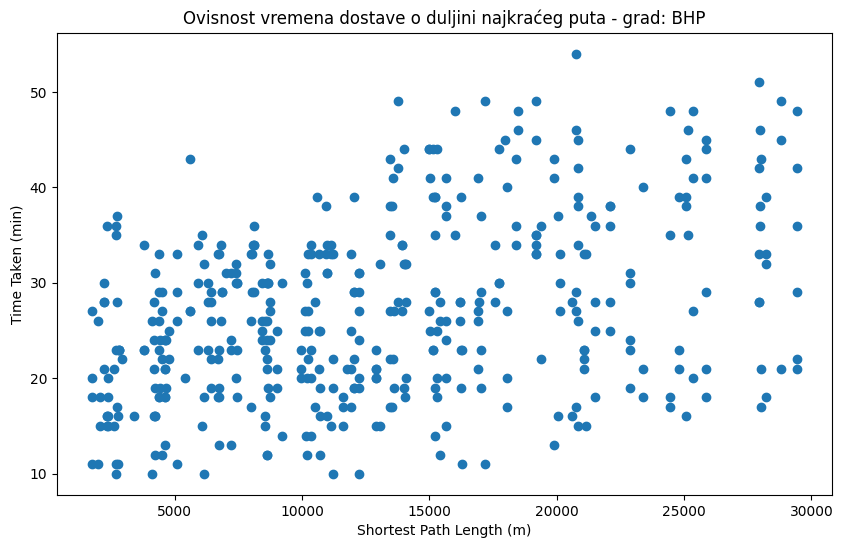

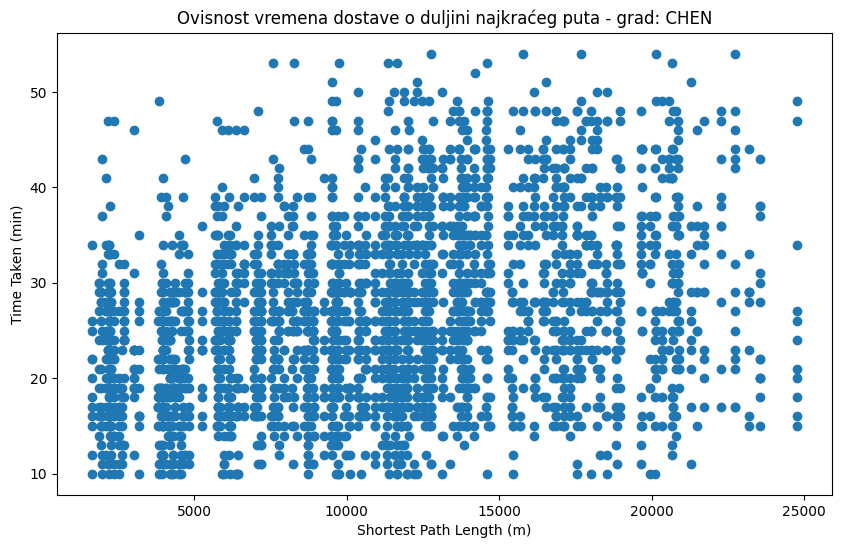

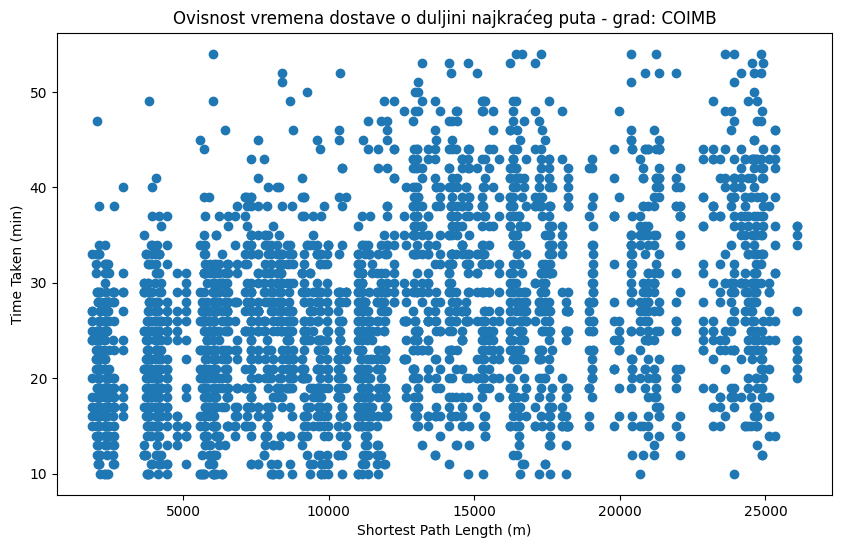

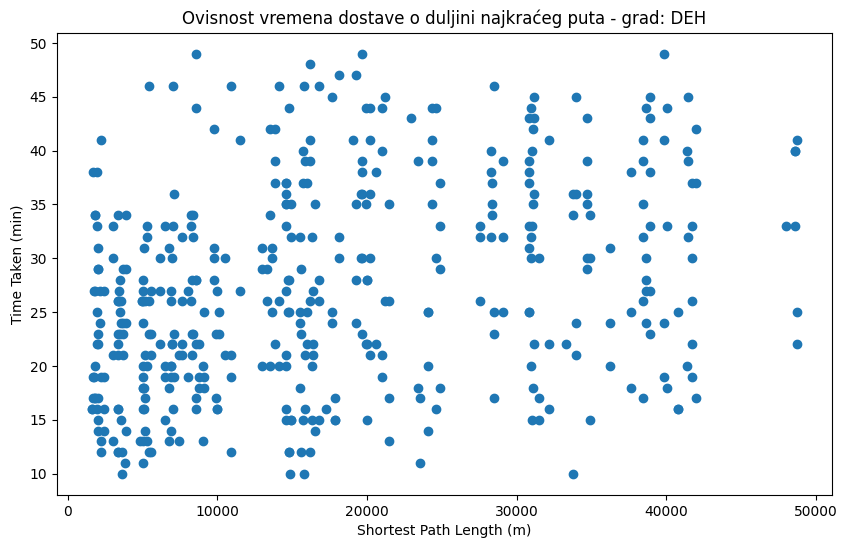

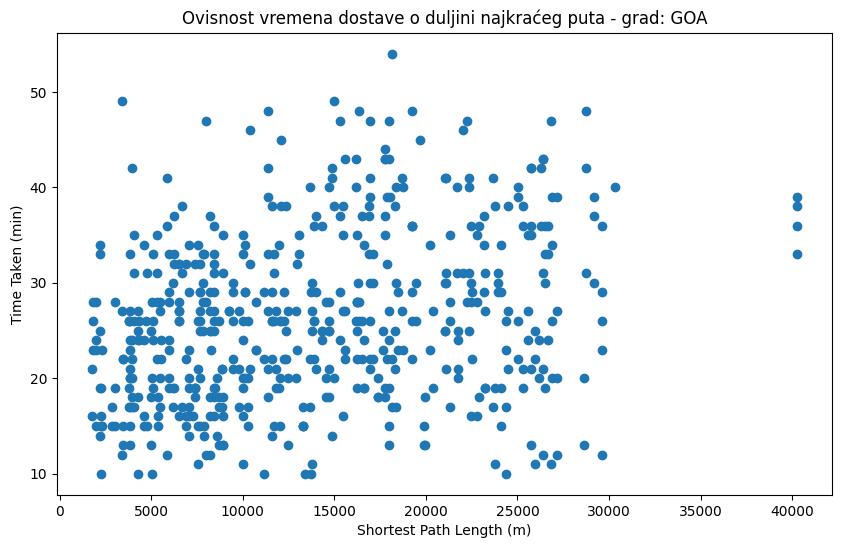

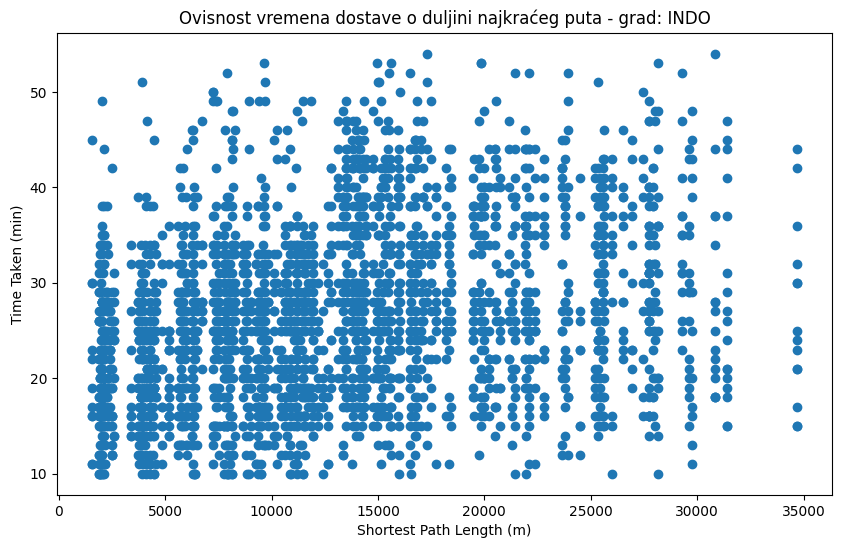

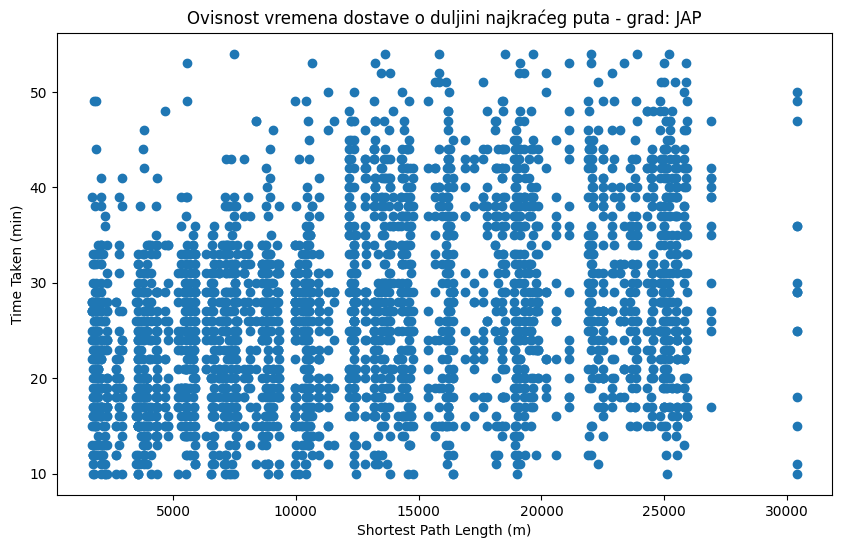

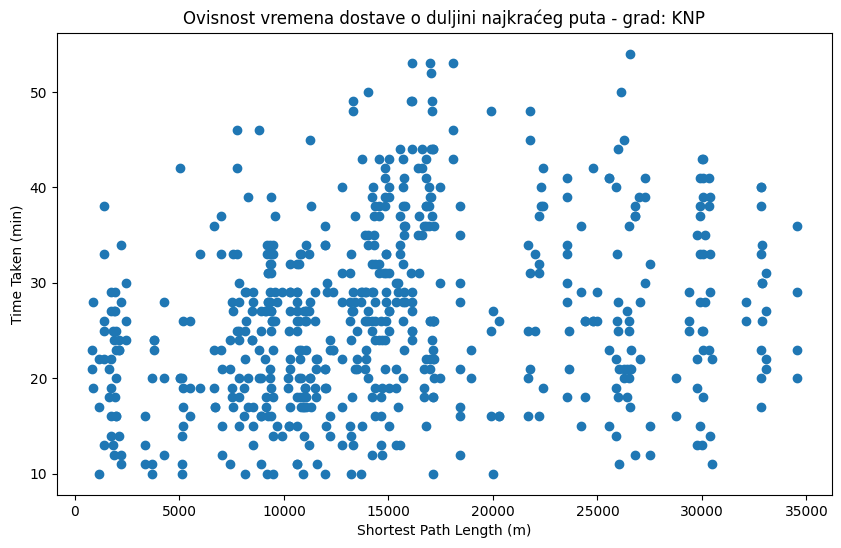

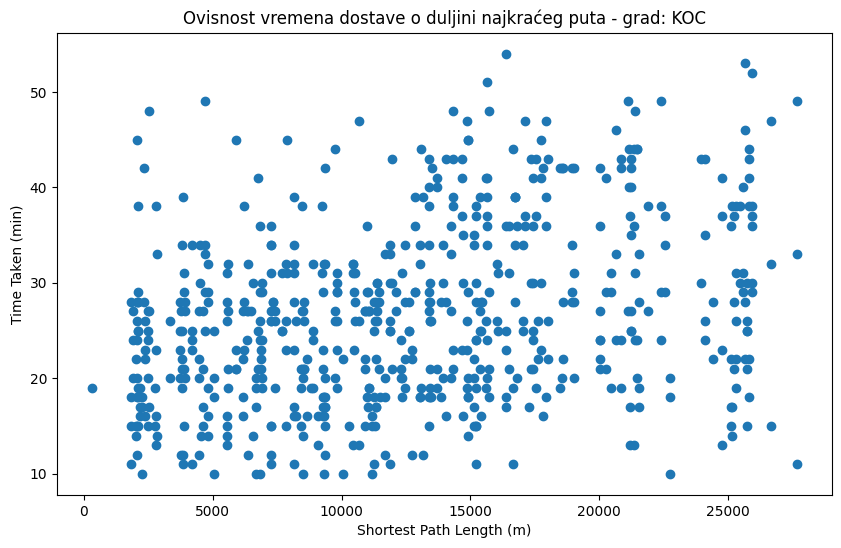

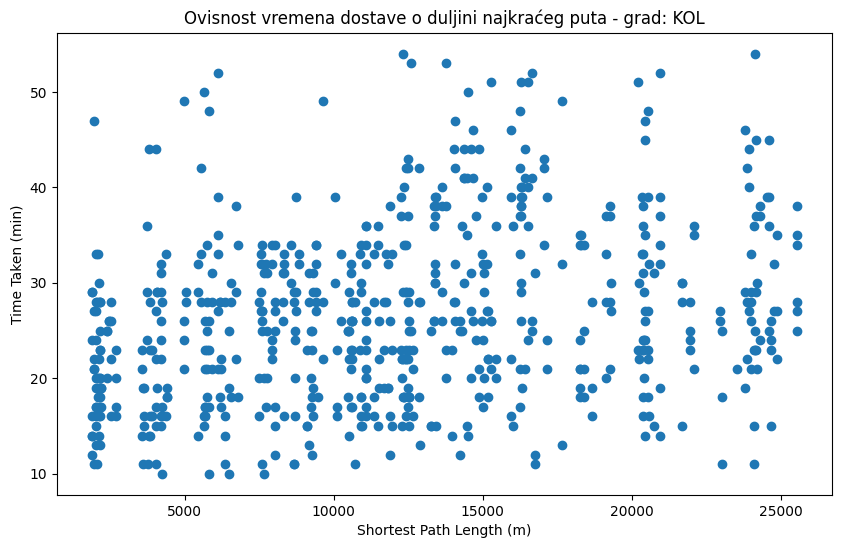

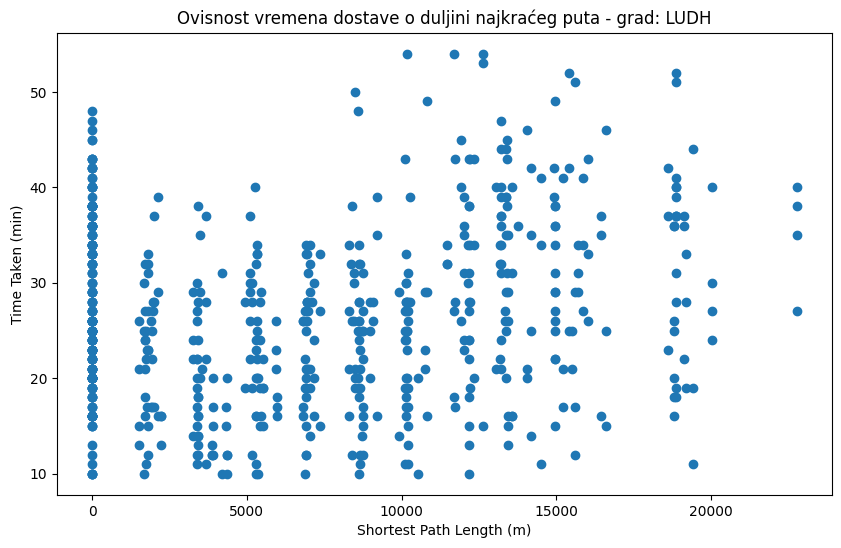

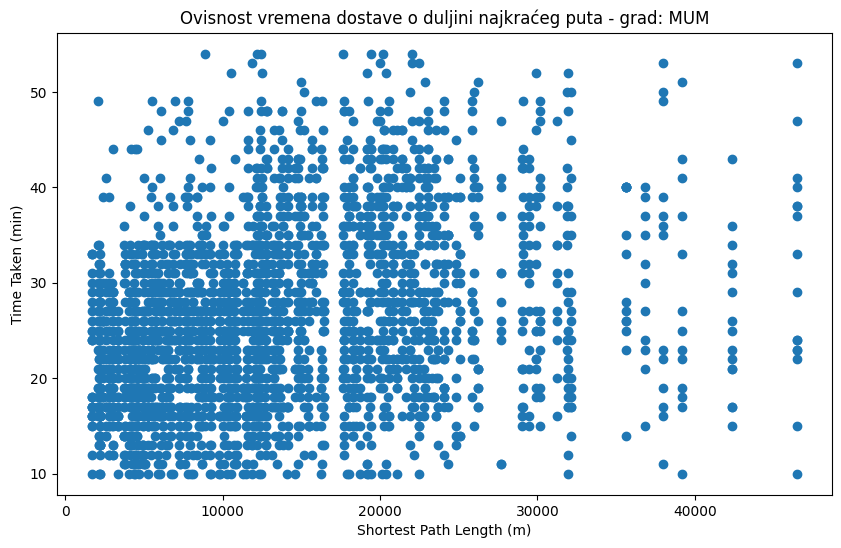

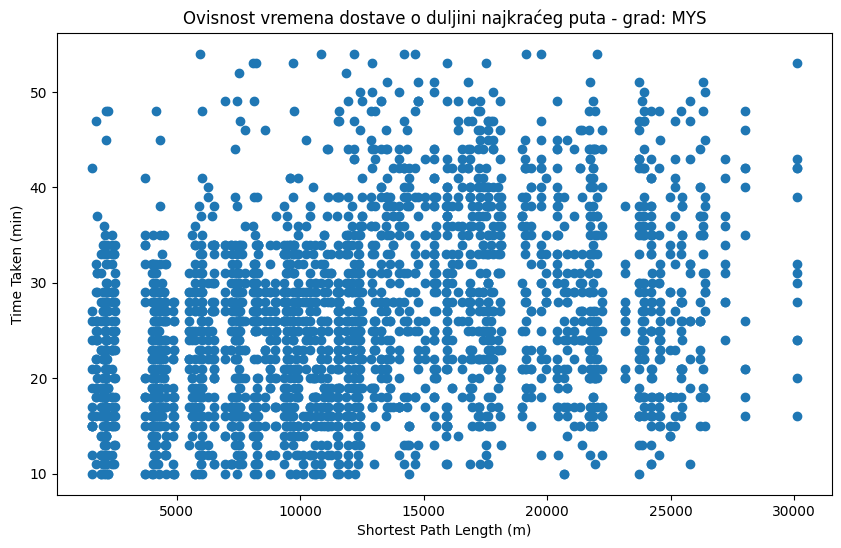

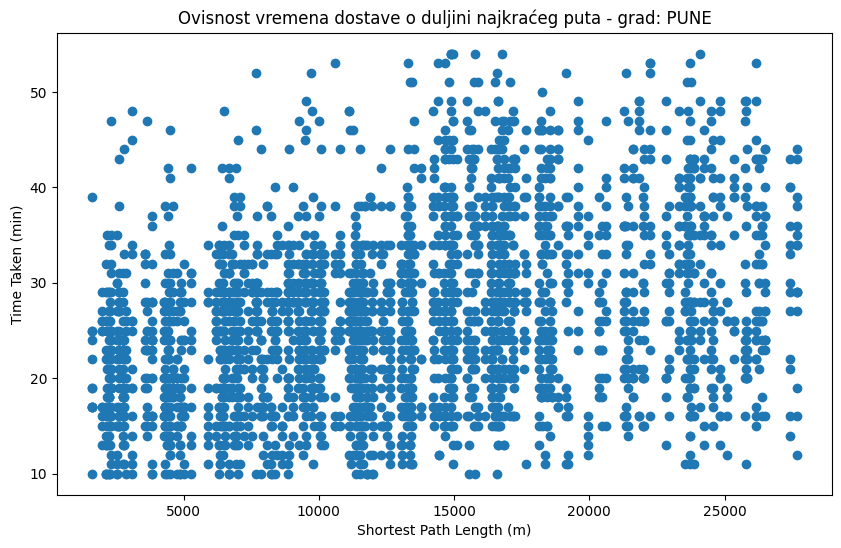

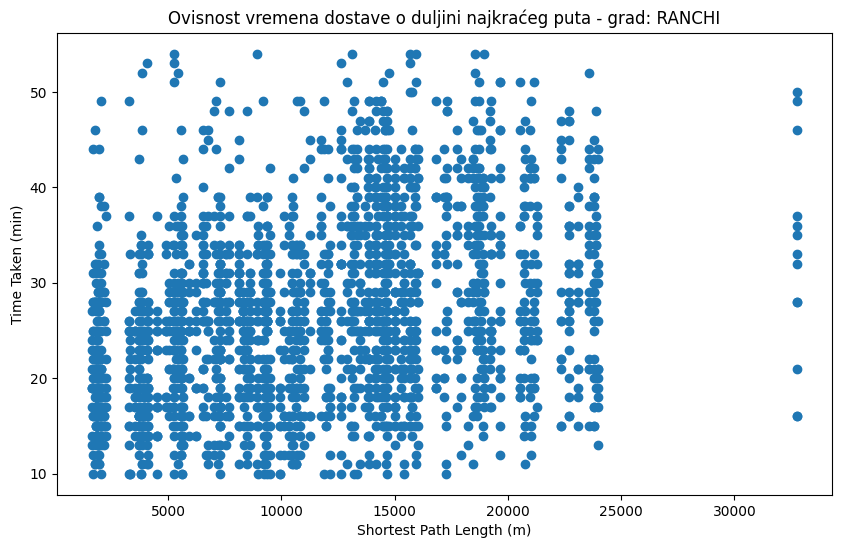

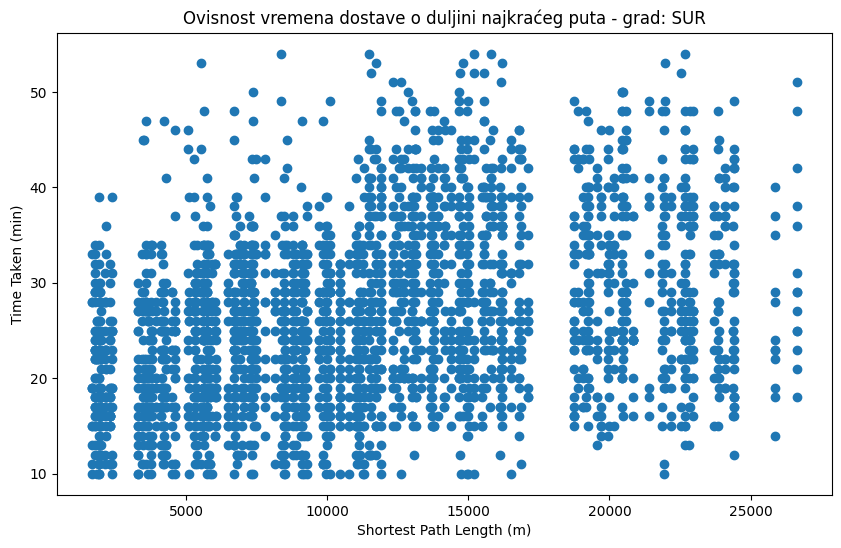

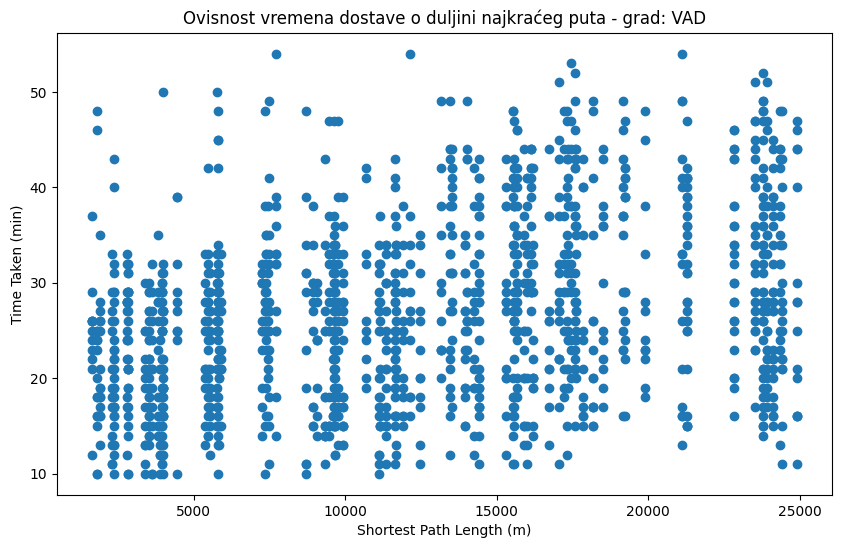

In [22]:
import matplotlib.pyplot as plt


grouped_data = altered_jointData.groupby('city_code')


for city_code, data in grouped_data:
    plt.figure(figsize=(10, 6))
    plt.scatter(data['shortest_path_length'], data['Time_taken(min)'])
    plt.xlabel('Shortest Path Length (m)')
    plt.ylabel('Time Taken (min)')
    plt.title(f'Ovisnost vremena dostave o duljini najkraćeg puta - grad: {city_code}')
    plt.show()
